In [ ]:
import ipywidgets as widgets
from IPython.display import display
import os

box_layout = widgets.Layout(
    display="flex",
    flex_flow="column",
    align_items="center",
    border="1px solid #E0E0E0",
    width="400px",
    padding="25px",
    border_radius="10px"
)

button_layout = widgets.Layout(width="100%", height="40px")

upload_layout = widgets.Layout(width="100%")

title = widgets.HTML(
    "<h3 style='margin-bottom:10px;'>Upload CSV Files 👇</h3>"
)

subtitle = widgets.HTML(
    "<p style='color:gray; margin-top:0;'>Select one or more CSV files to upload and save</p>"
)

train_uploader = widgets.FileUpload(
    accept='.csv',
    multiple=True,
    layout=upload_layout
)

save_button = widgets.Button(
    description='Save Files',
    button_style='primary',
    icon='save',
    layout=button_layout
)

status = widgets.HTML("<p style='color:gray;'>Waiting for upload...</p>")

output = widgets.Output()

def save_files(change=None):
    with output:
        output.clear_output()
        
        if train_uploader.value:
            saved_files = []
            for filename, file_info in train_uploader.value.items():
                with open(filename, "wb") as f:
                    f.write(file_info['content'])
                saved_files.append(filename)
            
            status.value = f"<p style='color:green;'>Saved {len(saved_files)} file(s) 👍</p>"
        else:
            status.value = "<p style='color:red;'>⚠️ No files uploaded yet</p>"

train_uploader.observe(save_files, names='value')

save_button.on_click(save_files)

card = widgets.VBox(
    [title, subtitle, train_uploader, save_button, status],
    layout=box_layout
)

display(card)
display(output)

Output()

In [3]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('file.csv', usecols=['Age', 'Fare', 'Survived'])

In [5]:
df.sample(5)

,Survived,Age,Fare
694,0,60.0,26.5500
838,1,32.0,56.4958
118,0,24.0,247.5208
92,0,46.0,61.1750
69,0,26.0,8.6625


In [6]:
df.isnull().mean()*100

,0
Survived,0.00000
Age,19.86532
Fare,0.00000


In [7]:
x = df.drop(columns=['Survived'])
y = df['Survived']

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=42
)

In [10]:
xtrain.sample(5)

,Age,Fare
821,27.0,8.6625
818,43.0,6.4500
303,NaN,12.3500
89,24.0,8.0500
47,NaN,7.7500


In [11]:
xtrain['Age_imputed'] = xtrain['Age']
xtest['Age_imputed'] = xtest['Age']

In [12]:
xtrain.sample(2)

,Age,Fare,Age_imputed
807,18.0,7.775,18.0
839,NaN,29.700,NaN


In [13]:
xtest.sample(2)

,Age,Fare,Age_imputed
493,71.0,49.5042,71.0
512,36.0,26.2875,36.0


### **Random Imputation for numeric data**

In [14]:
xtrain['Age_imputed'][xtrain['Age_imputed'].isnull()] = xtrain['Age'].dropna().sample(xtrain['Age'].isnull().sum()).values
xtest['Age_imputed'][xtest['Age_imputed'].isnull()] = xtest['Age'].dropna().sample(xtest['Age'].isnull().sum()).values

/tmp/ipython-input-26487712.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  xtrain['Age_imputed'][xtrain['Age_imputed'].isnull()] = xtrain['Age'].dropna().sample(xtrain['Age'].isnull().sum()).values
/tmp/ipython-input-26487712.py:2: Futu

In [16]:
xtrain.sample(5)

,Age,Fare,Age_imputed
184,4.0,22.0250,4.0
223,NaN,7.8958,32.0
288,42.0,13.0000,42.0
697,NaN,7.7333,21.0
132,47.0,14.5000,47.0


In [17]:
xtrain.isnull().sum()

,0
Age,140
Fare,0
Age_imputed,0


### **Results**

<Axes: xlabel='Age', ylabel='Density'>

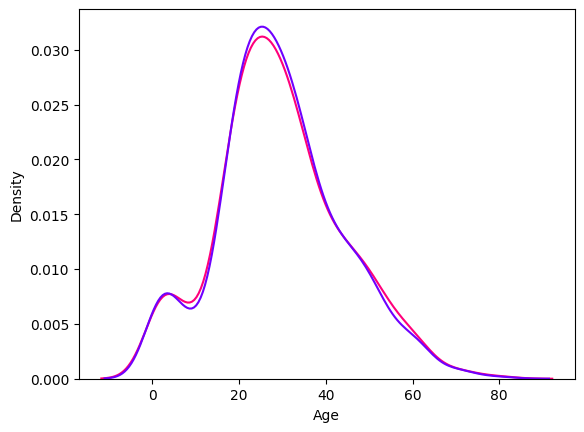

In [18]:
sb.kdeplot(data=xtrain['Age'], color="#ff007b")
sb.kdeplot(data=xtrain['Age_imputed'], color="#6f00ff")

### **Variance**
It tells how much one thing moves

In [20]:
print(f'''Variance
Original: {xtrain['Age'].var()}
After random imputation: {xtrain['Age_imputed'].var()}''')

Variance
Original: 210.2517072477438
After random imputation: 201.99831675279316


### **Covariance**
It tells how 2 things move together

In [21]:
xtrain[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2700.831981,71.580633,57.590118
Age,71.580633,210.251707,210.251707
Age_imputed,57.590118,210.251707,201.998317


### **Outlier effect**

<Axes: >

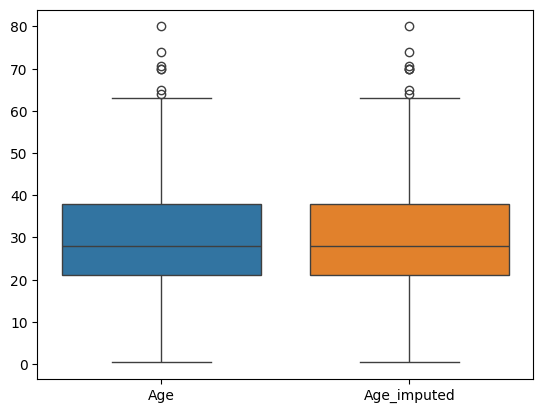

In [22]:
sb.boxplot(xtrain[['Age', 'Age_imputed']])